# Simple Linear Regression. Minimal example

### Import the relevant libraries

In [1]:
# To use mathematical operation
import numpy as np

# To plot some nice graphs and draw a random value form an interval
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on

In [3]:
# Variable containing the size of the training set.
observations = 1000

# We generate them randomly, drawing from an uniform distribution.
# The size of xs and zs is observations by 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix (y = x*w + b)
inputs = np.column_stack((xs,zs))

# Check if the dimensions of the inputs are the same as the ones was defined in the linear model lectures. 
# They should be n x k, where n is the number of observations, and k is the number of variables, so 1000 x 2.
print (inputs.shape)

(1000, 2)


### Generate the targets we will aim at

In [7]:
# Create a function, use the ML methodology, and check if the algorithm has learned it.
# We add a small random noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to the f(x,z) = 2x - 3z + 5 + noise definition.
targets = 2*xs - 3*zs + 5 + noise

# Check the shape of the targets.
print (targets.shape)

(1000, 1)


### Plot the training data


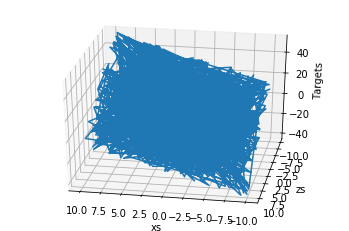

In [5]:
# In order to use the 3D plot, we reshape the targets.
targets = targets.reshape(observations,)

# Plotting according to the conventional matplotlib.pyplot syntax

# Declare the figure
fig = plt.figure()

# A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')

# Choose the axes.
ax.plot(xs, zs, targets)

# Set labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
# to azim = 0 ; azim = 200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# Shows the plot. 
plt.show()

# Reshape the targets back to the shape that they were in before plotting.
targets = targets.reshape(observations,1)

### Initialize variables

In [8]:
# We will initialize the weights and biases randomly in some small initial range.
# High initial ranges may prevent the machine learning algorithm from learning.
init_range = 0.1

# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
# In our case, the weights matrix is 2x1 since there are 2 inputs (x and z) and one output (y)
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))

# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

#Print the weights to get a sense of how they were initialized.
print (weights)
print (biases)

[[-0.00424358]
 [-0.01592529]]
[0.09887536]


### Set a learning rate

In [9]:
# Set some small learning rate (eta). 
# 0.02 is going to work quite well 
learning_rate = 0.02

### Train the model

In [10]:
# Iterate over our training dataset 100 times. That works well with a learning rate of 0.02.
# Generally a lower learning rate would need more iterations, while a higher learning rate would need less iterations
# A high learning rate may cause the loss to diverge to infinity, instead of converge to 0.
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    # Differences between the outputs and the targets
    deltas = outputs - targets
        
    # We are considering the L2-norm loss, but divided by 2 and further divide it by the number of observations.
    # This is simple rescaling by a constant. It doesn't change the optimization logic at all.
    # It is lower for better results, and higher for worse results
   
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # We print the loss function value at each step to observe whether it is decreasing as desired.
    print (loss)
    
    # Scale the deltas, doesn't change the logic. 
    deltas_scaled = deltas / observations
    
    # Finally, we must apply the gradient descent update rules of n-Parameter Gradient Descent.
    # The weights are 2x1, learning rate is 1x1 (scalar), inputs are 1000x2, and deltas_scaled are 1000x1
    # We must transpose the inputs so that we get an allowed operation.
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
    # The weights are updated in a linear algebraic way (a matrix minus another matrix)
    # The biases, however, are just a single number here, so we must transform the deltas into a scalar.
    # The two lines are both consistent with the gradient descent methodology. 

230.8666066357162
36.522917461709305
13.907008170259026
10.935576106598525
10.230665938003334
9.800638609716025
9.416081234554152
9.050009390137824
8.69878072535467
8.36147110216096
8.037491364141134
7.726310351424762
7.427421940004082
7.140340474079546
6.864599538460214
6.5997511492612215
6.345365020007412
6.101027861848257
5.866342712021979
5.6409282889191745
5.42441837263181
5.216461209973306
5.016718943002145
4.824867060120398
4.640593868855453
4.46359998946831
4.293597868565827
4.130311311926614
3.973475035781653
3.822834235820589
3.6781441732234983
3.5391697770455632
3.4056852623086757
3.2774737631795285
3.1543269806381553
3.036044844064616
2.9224351861939297
2.813313430911213
2.7085022933798037
2.6078314920151526
2.5111374718365855
2.4182631387474274
2.329057604311825
2.243375940613605
2.1610789447989096
2.082032912920037
2.0061094227131218
1.933185124956687
1.8631415430721323
1.7958648806405721
1.7312458365232946
1.6691794272854927
1.60956481663476
1.5523051515972286
1.49730740

### Print weights and biases and see if we have worked correctly.

In [14]:
# Print the weights and the biases, so we can see if they have converged to what we wanted.
# When declared the targets, following the f(x,z), we knew the weights should be 2 and -3, while the bias: 5.
print (weights, biases)

[[ 2.00576674]
 [-3.00333175]] [4.34392665]


### Plot last outputs vs targets


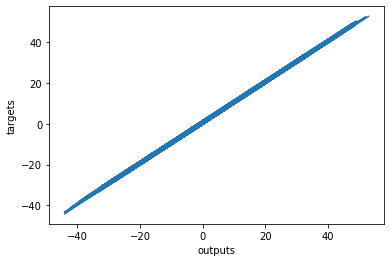

In [15]:
# Print the outputs and the targets in order to see if they have a linear relationship.
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()